In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from tqdm import tqdm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

In [2]:
# 한 번 정의 후 두번 정의하지 않는다
okt = Okt()

# 데이터 불러오기

In [3]:
df = pd.read_csv('./sentiment/comedy/movie_sentiment_1111_ExtremeJob.csv')
df

,title,link,score,review,sentiment
0,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...,0.97671
1,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,8,류승룡 드디어 심폐소생술 성공,0.74820
2,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,진짜 뻥안치고 ㅈㄴ 웃겼다,0.91061
3,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,계속 웃으면서 봤어요지금까지 이런맛은 없었다이것은 갈비인가 통닭인가수원왕갈비통닭입니...,0.68138
4,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,지금까지 이런 영화는 없었다 이것은 영화인가 통닭광고인가,0.19145
...,...,...,...,...,...
47026,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,재밌지 않다 예고편이 반이상했다 후반부에 나오는 건 그냥 그렇다,0.00834
47027,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,생각보다 평이 안좋네 ㅋㅋㅋㅋ코믹영화를 코믹으로만 봐야지 뭘 그리 따지나갠적으로 잼...,0.97837
47028,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,개인적으로 이러 저질스러운 코미디 영화는 더이상 흥행 안했으면 좋겠다 영화 보면서 ...,0.15393
47029,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,1,한국영화 억지웃음코드 ㅋㅋㅋ,0.01769


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47031 entries, 0 to 47030
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      47031 non-null  object 
 1   link       47031 non-null  object 
 2   score      47031 non-null  int64  
 3   review     47031 non-null  object 
 4   sentiment  47031 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


# 긍정 리뷰 분류

sentiment가 0.8이상, score가 3초과인 리뷰

In [5]:
positive = df[df['sentiment'] >= 0.8]
positive

,title,link,score,review,sentiment
0,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...,0.97671
2,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,진짜 뻥안치고 ㅈㄴ 웃겼다,0.91061
5,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,간만에 정치색 안띠고 마냥 한국식으로 웃긴 영화다류승룡도 완전 찰지고ㅋ흥해라,0.98723
8,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,마약반 형사들 각각 캐릭터가 확실했습니다 겹치는 점도 없었고 조합도 너무 좋았습니다...,0.98998
9,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,완전 내스타일 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 ㅋㅋ역시 갓승룡,0.98883
...,...,...,...,...,...
47000,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,진짜 여러번봐도 개꿀잼ㅜㅜㅜ,0.99592
47007,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,말그대로 웃기기만했다,0.94426
47018,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,이것이 진짜 코미디 영화다 진지한 장면에서도 빵빵터지는 유쾌함 괜객들은 이제 신파에...,0.88967
47025,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,이 평점들과 한줄평에 너무 동의할수가 없어서 남겨요 극장 꽉찼는데 영화 끝날때까지 ...,0.96348


In [6]:
positive = positive[positive['score'] > 3]
positive

,title,link,score,review,sentiment
0,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...,0.97671
2,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,진짜 뻥안치고 ㅈㄴ 웃겼다,0.91061
5,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,간만에 정치색 안띠고 마냥 한국식으로 웃긴 영화다류승룡도 완전 찰지고ㅋ흥해라,0.98723
8,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,마약반 형사들 각각 캐릭터가 확실했습니다 겹치는 점도 없었고 조합도 너무 좋았습니다...,0.98998
9,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,완전 내스타일 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 ㅋㅋ역시 갓승룡,0.98883
...,...,...,...,...,...
46986,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,년전 천만기록할 즈음에 봤어요영화보는 내내 예상치 못한 장면과 대사들로쉴시간 없이 ...,0.98416
46987,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,너무 잼있었음ㅋㅋㅋ 마약반 팀원들의 케미가 오짐 ㅋㅋ 다시보구싶당,0.99345
47000,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,진짜 여러번봐도 개꿀잼ㅜㅜㅜ,0.99592
47018,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,이것이 진짜 코미디 영화다 진지한 장면에서도 빵빵터지는 유쾌함 괜객들은 이제 신파에...,0.88967


In [7]:
pos_review = pd.DataFrame(positive['review'])
pos_review

,review
0,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...
2,진짜 뻥안치고 ㅈㄴ 웃겼다
5,간만에 정치색 안띠고 마냥 한국식으로 웃긴 영화다류승룡도 완전 찰지고ㅋ흥해라
8,마약반 형사들 각각 캐릭터가 확실했습니다 겹치는 점도 없었고 조합도 너무 좋았습니다...
9,완전 내스타일 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 ㅋㅋ역시 갓승룡
...,...
46986,년전 천만기록할 즈음에 봤어요영화보는 내내 예상치 못한 장면과 대사들로쉴시간 없이 ...
46987,너무 잼있었음ㅋㅋㅋ 마약반 팀원들의 케미가 오짐 ㅋㅋ 다시보구싶당
47000,진짜 여러번봐도 개꿀잼ㅜㅜㅜ
47018,이것이 진짜 코미디 영화다 진지한 장면에서도 빵빵터지는 유쾌함 괜객들은 이제 신파에...


# 특수문자 제거

In [8]:
# 'ㅋㅋㅋㅋ', 'ㅠㅠ' 같은 단어 포함시키지 않기 위해 "가-힣" 만 남기고 나머지 제거
pos_review['review'] = pos_review['review'].str.replace("[^가-힣 ]","")
pos_review.head()

,review
0,일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐어요 오랜만에 ...
2,진짜 뻥안치고 웃겼다
5,간만에 정치색 안띠고 마냥 한국식으로 웃긴 영화다류승룡도 완전 찰지고흥해라
8,마약반 형사들 각각 캐릭터가 확실했습니다 겹치는 점도 없었고 조합도 너무 좋았습니다...
9,완전 내스타일 류승룡 영화 요즘 말아먹더니 이번엔 대박 웃기네 역시 갓승룡


In [9]:
pos_review.isnull().values.any()

False

In [10]:
len(pos_review)

29177

# 불용어 정의 & tokenize

In [39]:
# 불용어 list
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '보다', '영화', '너무', '진짜', '이다', '까지', '있다', '없이', '정말', '오랜', '나오다', '없다', '부터', '같다', '간만', '않다', '재다', '가다', '자다', '보고', '오다', '넘다', '계속', '완전', '보기', '들다', '많이', '그냥', '에서', '되다', '아무', '아니다', '싶다', '하고', '엄청', '정도', '모르다', '한국', '이랑', '이렇게', '하나', '한번', '이렇다', '한국영', '같이', '만들다', '분들', '제일', '영화관', '많다', '빠지다', '끼리', '다시', '에요', '보고오다', '주다', '아주', '나다', '그렇다', '오랫', '잇다', '역시', '인데', '동안', '가장', '제대로', '모든', '이상', '극장', '이런', '만에', '인가', '해주다',  '특히', '이건', '드리다', '이에요', '쏘다', '이네', '맞다', '크다', '조금', '그리고', '크게', '영화로', '관람']

In [40]:
# positive review data 토큰화
pos_review_token = []
for sentence in tqdm(pos_review['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    pos_review_token.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 29177/29177 [01:00<00:00, 484.28it/s]


In [41]:
print(pos_review_token[:5])

[['일단', '진선규', '님', '께', '박수갈채', '부족함', '연기', '다양하다', '놀라다', '만', '부담', '코미디', '즐겁다', '조조', '로', '할인', '고', '제', '값', '만족하다', '습', '니당다', '밤새다', '웃기다', '힘'], ['뻥', '안치', '고', '웃기다'], ['정치', '색', '안띠', '고', '마냥', '식', '웃기다', '다', '류승룡', '찰지다', '고흥', '해', '라'], ['마약', '반', '형사', '각각', '캐릭터', '확실하다', '겹', '치다', '점도', '조합', '좋다', '악역', '그', '표정', '사투리', '찰지다', '욕설', '기', '억', '속', '남다', '웃다', '행복하다', '감정', '기억', '남다', '시사회', '로'], ['내', '스타일', '류승룡', '요즘', '말아먹다', '이번', '엔', '대박', '웃기', '네', '갓승룡']]


# flatten & word list 생성

In [42]:
# 다차원 list를 1차원으로 변경 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [43]:
pos_review_wordlist = flatten(pos_review_token)
print(pos_review_wordlist)

['일단', '진선규', '님', '께', '박수갈채', '부족함', '연기', '다양하다', '놀라다', '만', '부담', '코미디', '즐겁다', '조조', '로', '할인', '고', '제', '값', '만족하다', '습', '니당다', '밤새다', '웃기다', '힘', '뻥', '안치', '고', '웃기다', '정치', '색', '안띠', '고', '마냥', '식', '웃기다', '다', '류승룡', '찰지다', '고흥', '해', '라', '마약', '반', '형사', '각각', '캐릭터', '확실하다', '겹', '치다', '점도', '조합', '좋다', '악역', '그', '표정', '사투리', '찰지다', '욕설', '기', '억', '속', '남다', '웃다', '행복하다', '감정', '기억', '남다', '시사회', '로', '내', '스타일', '류승룡', '요즘', '말아먹다', '이번', '엔', '대박', '웃기', '네', '갓승룡', '조조', '로', '출근', '중', '저', '미치다', '웃다', '감동', '극', '직업', '제작', '떼엽', '시간', '내내', '웃기', '다', '신파', '재밌다', '더', '올해', '재미있다', '아직', '까진', '방금', '이하늬', '커플', '다', '글래스', '낫다', '비공', '극', '직업', '괜않다', '공감', '요', '부탁드리다', '네티즌', '여러분', '웃', '또', '개', '재밌다', '꼭', '보삼', '류승룡', '씨', '만', '흥행', '성공', '감히', '천만', '예상', '해', '생각', '따다', '봉', '염력', '충격', '받다', '류승룡', '이번', '괜찮다', '망설이다', '처음', '끝', '웃기다', '다', '깔깔', '깔다', '웃다', '스토리', '나름', '탄탄하다', '기대', '별', '생각', '웃다', '재밌다', '편하다', '좋다', '중간', '엇', '나가다', '끝', '유

In [44]:
len(pos_review_wordlist)

202498

# 문자 빈도수 계산

In [45]:
pos_review_wordlist = pd.Series([x for x in pos_review_wordlist if len(x)>1])
pd.DataFrame(pos_review_wordlist)

,0
0,일단
1,진선규
2,박수갈채
3,부족함
4,연기
...,...
146072,코믹
146073,코믹
146074,으로만
146075,그리다


In [46]:
len(pos_review_wordlist)

146077

In [50]:
# 상위 몇 개의 단어를 추출할 것인지 정의
word_num = 100

In [51]:
pos_review_wordlist_count = pos_review_wordlist.value_counts().head(word_num)
pd.DataFrame(pos_review_wordlist_count)

,0
재밌다,9004
웃다,7908
웃기다,4228
좋다,3918
재미있다,3715
...,...
예고편,204
통닭,204
괜찮다,198
킬링타임,198


In [52]:
pd.DataFrame(pos_review_wordlist_count).to_csv('./wordlist/comedy_ExtremeJob/ExtremeJob_positive_wordlist_2.csv', encoding='euckr')

In [53]:
# 막대 그래프 (bar-chart)
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
plt.rcParams['figure.figsize'] = (15, 10)

<AxesSubplot:>

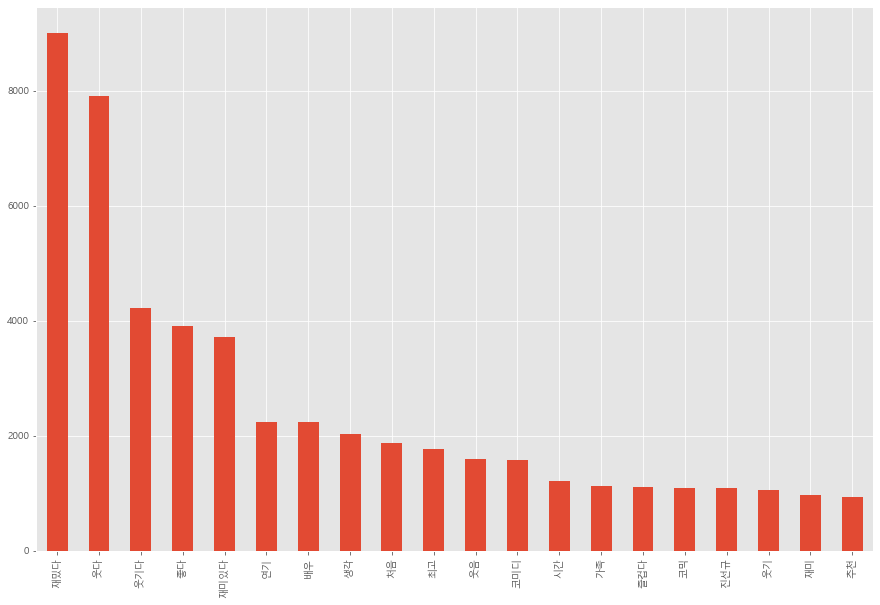

In [54]:
pos_review_wordlist_count[0:20].plot.bar()

# 워드클라우드 생성

In [55]:
# 사용할 폰트 저장 경로 확인必
font_path = "c:/windows/fonts/malgun.ttf"
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white')

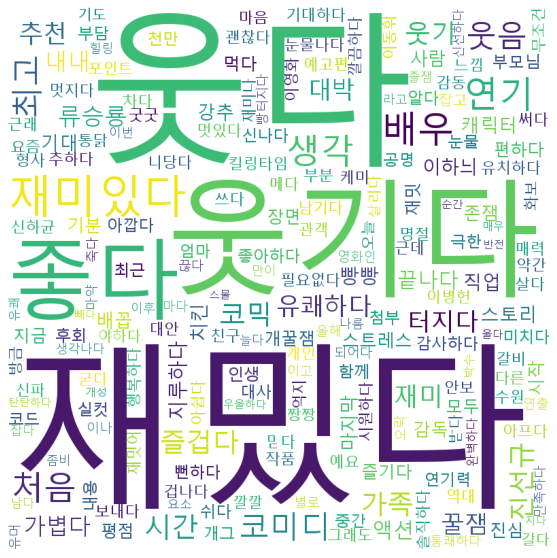

In [56]:
# 한글 워드크라우드
count_kor = Counter(pos_review_wordlist)
wordcloud_kor = wordcloud.generate_from_frequencies(count_kor)
fig_kor = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('comedy_ExtremeJob_positive_wordcloud')

# 부정 리뷰 분류

sentiment가 0.2 이하, score가 7 미만인 리뷰

In [22]:
negative = df[df['sentiment'] <= 0.2]
negative

,title,link,score,review,sentiment
4,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,지금까지 이런 영화는 없었다 이것은 영화인가 통닭광고인가,0.19145
17,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,5,유머코드가 맞냐 안맞냐의 차이같이 간 친구는 계속 웃던데 저는 그냥 그랬어요,0.01131
18,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,6,글쎄 그낭그랬는데 나만그런가,0.02138
23,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,1,나랑은 안맞는듯 너무 억지로 웃길려고 발악하는 느낌,0.00434
24,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,10,치킨으로 이렇게 웃기기 있기 없기,0.12241
...,...,...,...,...,...
47024,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,염력피하고 리얼피하고 물괴피하고 더벙커피했는데 이걸못피했다,0.01650
47026,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,재밌지 않다 예고편이 반이상했다 후반부에 나오는 건 그냥 그렇다,0.00834
47028,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,개인적으로 이러 저질스러운 코미디 영화는 더이상 흥행 안했으면 좋겠다 영화 보면서 ...,0.15393
47029,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,1,한국영화 억지웃음코드 ㅋㅋㅋ,0.01769


In [23]:
negative = negative[negative['score'] < 7]
negative

,title,link,score,review,sentiment
17,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,5,유머코드가 맞냐 안맞냐의 차이같이 간 친구는 계속 웃던데 저는 그냥 그랬어요,0.01131
18,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,6,글쎄 그낭그랬는데 나만그런가,0.02138
23,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,1,나랑은 안맞는듯 너무 억지로 웃길려고 발악하는 느낌,0.00434
27,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,6,웃음코드가 나랑 안맞음,0.05158
30,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,1,내가 너무 야박하고 냉정한건가 하나도 안웃기던데 억지 웃음 포인트 만들어서 별로 ㅡㅡ,0.00041
...,...,...,...,...,...
47024,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,염력피하고 리얼피하고 물괴피하고 더벙커피했는데 이걸못피했다,0.01650
47026,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,재밌지 않다 예고편이 반이상했다 후반부에 나오는 건 그냥 그렇다,0.00834
47028,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,2,개인적으로 이러 저질스러운 코미디 영화는 더이상 흥행 안했으면 좋겠다 영화 보면서 ...,0.15393
47029,극한직업,https://movie.naver.com/movie/bi/mi/pointWrite...,1,한국영화 억지웃음코드 ㅋㅋㅋ,0.01769


In [24]:
neg_review = pd.DataFrame(negative['review'])
neg_review

,review
17,유머코드가 맞냐 안맞냐의 차이같이 간 친구는 계속 웃던데 저는 그냥 그랬어요
18,글쎄 그낭그랬는데 나만그런가
23,나랑은 안맞는듯 너무 억지로 웃길려고 발악하는 느낌
27,웃음코드가 나랑 안맞음
30,내가 너무 야박하고 냉정한건가 하나도 안웃기던데 억지 웃음 포인트 만들어서 별로 ㅡㅡ
...,...
47024,염력피하고 리얼피하고 물괴피하고 더벙커피했는데 이걸못피했다
47026,재밌지 않다 예고편이 반이상했다 후반부에 나오는 건 그냥 그렇다
47028,개인적으로 이러 저질스러운 코미디 영화는 더이상 흥행 안했으면 좋겠다 영화 보면서 ...
47029,한국영화 억지웃음코드 ㅋㅋㅋ


# 특수문자 제거

In [25]:
# 'ㅋㅋㅋㅋ', 'ㅠㅠ' 같은 단어 포함시키지 않기 위해 "가-힣" 만 남기고 나머지 제거
neg_review['review'] = neg_review['review'].str.replace("[^가-힣 ]","")
neg_review.head()

,review
17,유머코드가 맞냐 안맞냐의 차이같이 간 친구는 계속 웃던데 저는 그냥 그랬어요
18,글쎄 그낭그랬는데 나만그런가
23,나랑은 안맞는듯 너무 억지로 웃길려고 발악하는 느낌
27,웃음코드가 나랑 안맞음
30,내가 너무 야박하고 냉정한건가 하나도 안웃기던데 억지 웃음 포인트 만들어서 별로


In [26]:
neg_review.isnull().values.any()

False

In [27]:
len(neg_review)

5276

# 불용어 정의 & tokenize

In [57]:
# 불용어 list
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '영화', '보다', '너무', '없다', '그냥', '진짜', '아니다', '이다', '같다', '정도', '않다', '있다', '나오다', '맞다', '에서', '그렇다', '되다', '정말', '많다', '넘다', '이렇다', '가다', '한국영', '모르다', '보고', '주다', '한국', '많이', '까지', '하나', '하고', '만들다', '들다', '자다', '안되다', '인데', '인가', '오다', '이렇게', '보기', '한번', '없이', '말다', '싶다', '라고', '만이', '이나', '인지', '그렇게', '건가', '영화관', '크다', '어떻다', '부터', '짜다', '받다', '이건', '이런', '나다', '알다', '그저', '극장', '이랑', '엄청', '아무', '에는', '이상', '도대체', '빼다', '런가', '무슨', '때문', '보지', '이하', '우리나라', '역시', '다른', '이라니', '재다', '절대', '같이', '라니', '낮다', '이고', '그나마', '전부', '이라', '어디서', '이영화', '계속', '완전', '근데', '넣다', '기다', '전혀', '쓰다']

In [58]:
# negative review data 토큰화
neg_review_token = []
for sentence in tqdm(neg_review['review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    neg_review_token.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 5276/5276 [00:15<00:00, 331.40it/s]


In [59]:
print(neg_review_token[:5])

[['유머', '코드', '안', '차이', '간', '친구', '웃다', '저'], ['글쎄', '그', '낭', '그랬는데', '나', '만', '그'], ['나', '랑은', '안', '억지로', '웃기다', '발악', '느낌'], ['웃음', '코드', '나', '랑', '안'], ['내', '야박하다', '냉정하다', '안', '웃기다', '억지', '웃음', '포인트', '별로']]


# flatten & word list 생성

In [60]:
# 다차원 list를 1차원으로 변경 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [61]:
neg_review_wordlist = flatten(neg_review_token)
print(neg_review_wordlist)

['유머', '코드', '안', '차이', '간', '친구', '웃다', '저', '글쎄', '그', '낭', '그랬는데', '나', '만', '그', '나', '랑은', '안', '억지로', '웃기다', '발악', '느낌', '웃음', '코드', '나', '랑', '안', '내', '야박하다', '냉정하다', '안', '웃기다', '억지', '웃음', '포인트', '별로', '너무나', '예측', '솔직하다', '저', '재미없다', '웃기다', '예측', '되어다', '평점', '믿다', '유치하다', '어느', '지점', '웃음', '건지다', '진심', '다', '재밌다', '나', '재미없다', '다', '빵터지다', '웃다', '그', '낭', '실소', '관객', '웃다', '서나', '왠지', '웃다', '안', '웃기다', '유치하다', '가끔', '이동희', '웃기다', '웃음', '코드', '안', '감독', '여기', '서다', '관객', '웃다', '해', '억지로', '연출', '을', '것', '자연스럽다', '웃음', '여기', '서', '내', '웃다', '야하다', '부담', '감', '을', '느낌', '어의', '웃다', '을', '평론가', '평점', '초딩', '유머', '코드', '초딩', '혼자', '웃다', '억', '지', '개그', '너', '무과', '노잼', '임', '웃음', '코드', '남', '과는', '가보다', '안', '웃다', '옆', '남자친구', '굳다', '표정', '사람', '웃기다', '웃다', '억지', '웃음', '억지', '대사', '끼우다', '맞추다', '스토리', '최근', '중', '시간', '아깝다', '느끼다', '음', '생각', '저', '별로', '허탈하다', '개콘', '보라', '가라', '억지', '웃음', '장난', '웃음', '안', '점도', '아깝다', '안', '유치하다', '코미디', '줄', '평점', '낚였네요', '두', '번', '피', '식'

In [62]:
len(neg_review_wordlist)

56345

# 문자 빈도수 계산

In [63]:
neg_review_wordlist = pd.Series([x for x in neg_review_wordlist if len(x)>1])
pd.DataFrame(neg_review_wordlist)

,0
0,유머
1,코드
2,차이
3,친구
4,웃다
...,...
39180,웃기다
39181,억지
39182,스럽게
39183,웃기


In [64]:
len(neg_review_wordlist)

39185

In [68]:
# 상위 몇 개의 단어를 추출할 것인지 정의
word_num = 100

In [69]:
neg_review_wordlist_count = neg_review_wordlist.value_counts().head(word_num)
pd.DataFrame(neg_review_wordlist_count)

,0
웃기다,1088
웃음,1028
평점,620
유치하다,582
재미없다,550
...,...
가족,51
심하다,51
찍다,51
전개,50


In [70]:
pd.DataFrame(neg_review_wordlist_count).to_csv('./wordlist/comedy_ExtremeJob/ExtremeJob_negative_wordlist_2.csv', encoding='euckr')

In [71]:
# 막대 그래프 (bar-chart)
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
plt.rcParams['figure.figsize'] = (15, 10)

<AxesSubplot:>

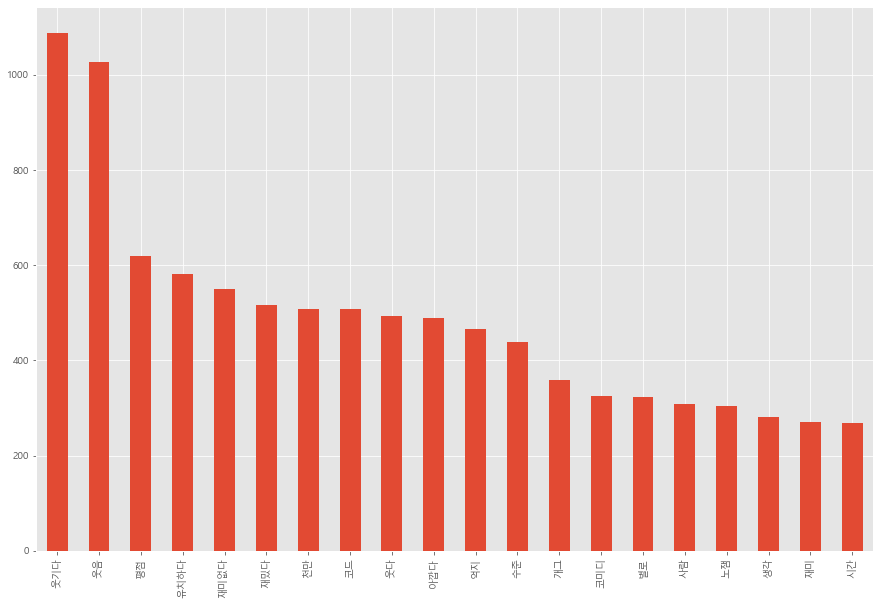

In [72]:
neg_review_wordlist_count[0:20].plot.bar()

# 워드클라우드 생성

In [73]:
# 사용할 폰트 저장 경로 확인必
font_path = "c:/windows/fonts/malgun.ttf"
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = 'white')

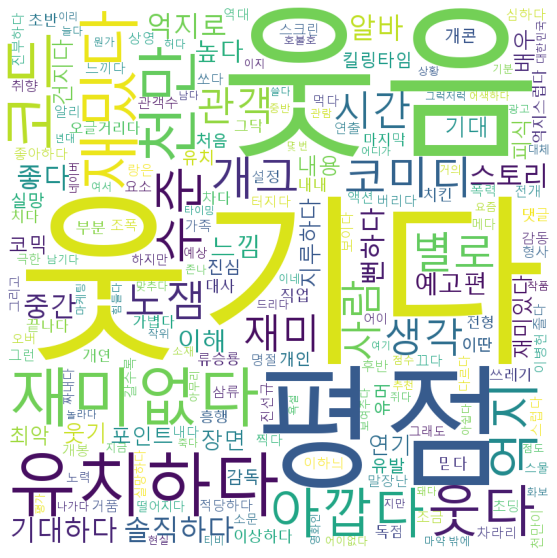

In [74]:
# 한글 워드크라우드
count_kor = Counter(neg_review_wordlist)
wordcloud_kor = wordcloud.generate_from_frequencies(count_kor)
fig_kor = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('comedy_ExtremeJob_negative_wordcloud')